# Variació de K i ponderació per dist

In [1]:
# Uncomment to upgrade packages
# !pip install pandas --user --upgrade --quiet
# !pip install numpy --user --upgrade --quiet
# !pip install scipy --user --upgrade --quiet
# !pip install statsmodels --user --upgrade --quiet
# !pip install seaborn --user --upgrade --quiet
# !pip install scikit-learn --user --upgrade --quiet

%load_ext autoreload

In [2]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
import warnings


InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.precision', 3)
sns.set()
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)

In [3]:
# extra imports
import seaborn as sns
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [4]:
Train_subset = read_csv("train_norm.csv", index_col=0, delimiter=';')
Val_subset = read_csv("val_norm.csv", index_col=0, delimiter=';')

y_train = read_csv("y_train.csv", index_col=0, delimiter=';')
y_val = read_csv("y_val.csv", index_col=0, delimiter=';')

## Escollir paràmetres

In [6]:
# leaf_size = list(range(1,50))
n_neighbors = list(range(1,50))
p=[1,2]
weights = ['uniform', 'distance']
hyperparameters = dict(n_neighbors=n_neighbors, weights=weights, p=p)

### Optimització de hyperparàmetres mitjançant Cross-Validation amb els paràmetres escollits

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)

knn=knn.fit(Train_subset, y_train)

train_predictions=knn.predict(Train_subset)

In [7]:
knn = KNeighborsClassifier()

clf = GridSearchCV(knn, hyperparameters, cv=4, scoring='recall')

knn=clf.fit(Train_subset, y_train)

train_predictions=knn.predict(Train_subset)

## Resultats de les mètriques

In [8]:
knn.best_score_

0.8768414093064936

In [9]:
print(clf.best_score_)

0.8768414093064936


In [10]:
result = pd.DataFrame(knn.cv_results_)

In [11]:
# result = result.sort_values("mean_test_f1", ascending=False)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006,7.069e-04,0.059,5.959e-03,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.805,0.795,0.762,0.762,0.781,0.020,187
1,0.006,4.330e-04,0.023,1.071e-06,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.805,0.795,0.762,0.762,0.781,0.020,187
2,0.007,4.681e-04,0.044,8.979e-04,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.785,0.776,0.768,0.758,0.772,0.010,190
3,0.006,5.013e-04,0.013,4.993e-04,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.785,0.776,0.768,0.758,0.772,0.010,190
4,0.006,4.331e-04,0.055,4.993e-04,2,1,uniform,"{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}",0.660,0.647,0.649,0.662,0.655,0.007,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0.006,9.443e-07,0.021,4.332e-04,48,2,distance,"{'n_neighbors': 48, 'p': 2, 'weights': 'distan...",0.868,0.908,0.861,0.868,0.876,0.018,3
192,0.006,7.079e-04,0.062,1.090e-03,49,1,uniform,"{'n_neighbors': 49, 'p': 1, 'weights': 'uniform'}",0.861,0.898,0.861,0.861,0.870,0.016,62
193,0.006,4.319e-04,0.033,8.307e-04,49,1,distance,"{'n_neighbors': 49, 'p': 1, 'weights': 'distan...",0.865,0.898,0.864,0.871,0.874,0.014,9
194,0.006,4.326e-04,0.054,1.920e-03,49,2,uniform,"{'n_neighbors': 49, 'p': 2, 'weights': 'uniform'}",0.865,0.888,0.854,0.868,0.869,0.012,82


In [12]:


# sns.lineplot(data=result, x="param_n_neighbors", y="mean_test_f1", hue="param_metric")
# plt.legend(loc='lower right')

## Hyperparàmetres escollits

In [13]:
print(knn.best_estimator_)

KNeighborsClassifier(n_neighbors=46, weights='distance')


In [14]:
# print('Best leaf_size:', knn.best_estimator_.get_params()['leaf_size'])
print('Best p:', knn.best_estimator_.get_params()['p'])
print('Best n_neighbors:', knn.best_estimator_.get_params()['n_neighbors'])  #K
print('Best pond:', knn.best_estimator_.get_params()['weights'])

Best p: 2
Best n_neighbors: 46
Best pond: distance


# Validation fix

In [15]:
# entrenem amb els parametres escollits
best_knn = KNeighborsClassifier(n_neighbors=knn.best_estimator_.get_params()['n_neighbors'],
                                p=knn.best_estimator_.get_params()['p'], weights=knn.best_estimator_.get_params()['weights'])
best_knn.fit(Train_subset, y_train)

KNeighborsClassifier(n_neighbors=46, weights='distance')

In [16]:
# prediccio i metriques
y_preds  = best_knn.predict(Val_subset)


print(metrics.classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78       330
           1       0.76      0.87      0.81       329

    accuracy                           0.80       659
   macro avg       0.80      0.80      0.79       659
weighted avg       0.80      0.80      0.79       659



In [17]:
metrics.confusion_matrix(y_val, y_preds)

array([[239,  91],
       [ 44, 285]], dtype=int64)

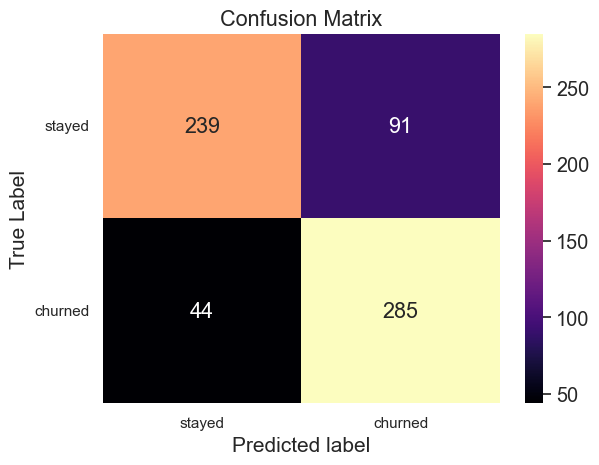

<Figure size 1000x700 with 0 Axes>

In [18]:
matrix = metrics.confusion_matrix(y_val,  
                                            y_preds)#turn this into a dataframe

labels = ['stayed', 'churned']  
matrix_df = pd.DataFrame(matrix)#plot the result
ax = plt.axes()
_ = sns.set(font_scale=1.3)
_ = plt.figure(figsize=(10,7))
_ = sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
_ = ax.set_title('Confusion Matrix')
_ = ax.set_xlabel("Predicted label", fontsize =15)
_ = ax.set_xticklabels(labels)
_ = ax.set_ylabel("True Label", fontsize=15)
_ = ax.set_yticklabels(labels, rotation = 0)
_ = plt.show()